In [40]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import xlrd

In [41]:
df_excel = pd.read_excel('/Users/Jia/Downloads/data_skripsi/tb/data_tb.xlsx')

Convert Datetime (TB)

In [42]:
# Mengonversi kolom 'time' ke tipe data datetime
df_excel['time'] = pd.to_datetime(df_excel['time'])

# Menambahkan kolom 'month'
df_excel['month'] = df_excel['time'].dt.month

# Menambahkan kolom 'year'
df_excel['year'] = df_excel['time'].dt.year

In [43]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   KABKOT     300 non-null    object        
 1   month      300 non-null    int32         
 2   year       300 non-null    int32         
 3   tb         300 non-null    int64         
 4   longitude  300 non-null    float64       
 5   latitude   300 non-null    float64       
 6   time       300 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(1)
memory usage: 14.2+ KB


Merapihkan Data TB 2018-2023

In [44]:
import calendar

In [47]:
# Filter for years 2018-2022
df_tb = df_excel[(df_excel['year'] >= 2018) & (df_excel['year'] <= 2022)]

# Group tb_total by KABKOT and month
tb_total = df_tb.groupby(['KABKOT', 'month'])['tb'].sum()
tb_total

KABKOT           month
JAKARTA BARAT    1        3404
                 2        2822
                 3        3223
                 4        3053
                 5        2812
                 6        2678
                 7        2851
                 8        2970
                 9        3086
                 10       3191
                 11       3231
                 12       2867
JAKARTA PUSAT    1        3100
                 2        2371
                 3        2598
                 4        2447
                 5        2199
                 6        2108
                 7        2473
                 8        2417
                 9        2348
                 10       2076
                 11       2090
                 12       1970
JAKARTA SELATAN  1        3086
                 2        2470
                 3        2809
                 4        2710
                 5        2376
                 6        2541
                 7        2793
                

Merapihkan Data PM 10 2018-2023

In [48]:
df_pm10 = pd.read_csv(r'/Users/Jia/Downloads/data_skripsi/PM_10/dissolved_result_pm10.csv')
df_pm10 = df_pm10.drop(['Unnamed: 0'], axis=1)
print(df_pm10.columns)

Index(['KABKOT', 'month', 'year', 'longitude', 'latitude', 'pm10', 'time'], dtype='object')


In [49]:
# Filter for years 2018-2022
df_pm10 = df_pm10[(df_pm10['year'] >= 2018) & (df_pm10['year'] <= 2022)]

# Group pm10_mean by KABKOT and month
pm10_mean = df_pm10.groupby(['KABKOT', 'month'])['pm10'].mean()
pm10_mean

KABKOT           month
JAKARTA BARAT    1        54.820748
                 2        58.284398
                 3        65.689203
                 4        79.537229
                 5        87.775776
                 6        90.324803
                 7        89.094666
                 8        85.099615
                 9        82.619808
                 10       81.994651
                 11       71.171407
                 12       58.058233
JAKARTA PUSAT    1        56.956311
                 2        60.143347
                 3        68.406327
                 4        81.652127
                 5        89.382064
                 6        91.474187
                 7        89.686927
                 8        85.340752
                 9        83.144665
                 10       82.818730
                 11       72.915547
                 12       60.314756
JAKARTA SELATAN  1        58.780765
                 2        62.682371
                 3        70.917246
     

Merge Files

In [50]:
# Merge DataFrames on 'KABKOT' 'month'
df_tb_pm10 = pd.merge(tb_total, pm10_mean, on=['KABKOT', 'month'])
df_tb_pm10

tb       pm10
KABKOT          month                 
JAKARTA BARAT   1      3404  54.820748
                2      2822  58.284398
                3      3223  65.689203
                4      3053  79.537229
                5      2812  87.775776
                6      2678  90.324803
                7      2851  89.094666
                8      2970  85.099615
                9      3086  82.619808
                10     3191  81.994651
                11     3231  71.171407
                12     2867  58.058233
JAKARTA PUSAT   1      3100  56.956311
                2      2371  60.143347
                3      2598  68.406327
                4      2447  81.652127
                5      2199  89.382064
                6      2108  91.474187
                7      2473  89.686927
                8      2417  85.340752
                9      2348  83.144665
                10     2076  82.818730
                11     2090  72.915547
                12     1970  60.314756
JAKARTA SELATAN 1      3086  58.780765
                2      2470  62.682371
                3      2809  70.917246
                4      2710  85.784375
                5      2376  94.724891
                6      2541  96.761875
                7      2793  95.213701
                8      2691  90.019203
                9      2720  86.698146
                10     2477  85.177124
                11     2285  74.967761
                12     2155  61.987857
JAKARTA TIMUR   1      4791  58.599203
                2      3751  61.636611
                3      4836  70.300092
                4      4400  83.247013
                5      3831  90.793288
                6      3882  92.473735
                7      4265  90.329499
                8      4318  85.434753
                9      4573  83.109332
                10     3732  82.739552
                11     3475  73.687261
                12     3275  61.715367
JAKARTA UTARA   1      2541  54.458266
                2      1856  56.914749
                3      2181  64.881817
                4      2105  76.446954
                5      1941  83.006179
                6      1834  85.126358
                7      2035  83.181407
                8      2135  79.558867
                9      2135  78.268015
                10     1812  79.099616
                11     1811  69.705743
                12     1686  57.704309

In [51]:
df_tb_pm10 = df_tb_pm10.groupby(['KABKOT', 'month']).agg({'tb':'sum', 'pm10':'mean'}).reset_index()
# reset_index() untuk memisahkan kolom KABKOT dan month

In [52]:
df_tb_pm10

,KABKOT,month,tb,pm10
0,JAKARTA BARAT,1,3404,54.820748
1,JAKARTA BARAT,2,2822,58.284398
2,JAKARTA BARAT,3,3223,65.689203
3,JAKARTA BARAT,4,3053,79.537229
4,JAKARTA BARAT,5,2812,87.775776
5,JAKARTA BARAT,6,2678,90.324803
6,JAKARTA BARAT,7,2851,89.094666
7,JAKARTA BARAT,8,2970,85.099615
8,JAKARTA BARAT,9,3086,82.619808
9,JAKARTA BARAT,10,3191,81.994651


In [13]:
#df_tb_pm10.to_csv("/Users/Jia/Downloads/data_skripsi/a_overlay/tb_pm10.csv")

Datetime edit for 'month'

In [53]:
import calendar

# Format for monthly graph
df_tb_pm10['month'] = pd.to_datetime(df_tb_pm10['month'], format='%m').dt.month_name()

# Set the ['month_name'] as an index
df_tb_pm10= df_tb_pm10.set_index('month').reset_index()

In [54]:
df_tb_pm10

,month,KABKOT,tb,pm10
0,January,JAKARTA BARAT,3404,54.820748
1,February,JAKARTA BARAT,2822,58.284398
2,March,JAKARTA BARAT,3223,65.689203
3,April,JAKARTA BARAT,3053,79.537229
4,May,JAKARTA BARAT,2812,87.775776
5,June,JAKARTA BARAT,2678,90.324803
6,July,JAKARTA BARAT,2851,89.094666
7,August,JAKARTA BARAT,2970,85.099615
8,September,JAKARTA BARAT,3086,82.619808
9,October,JAKARTA BARAT,3191,81.994651


Overlay layer plot for TB and PM 10

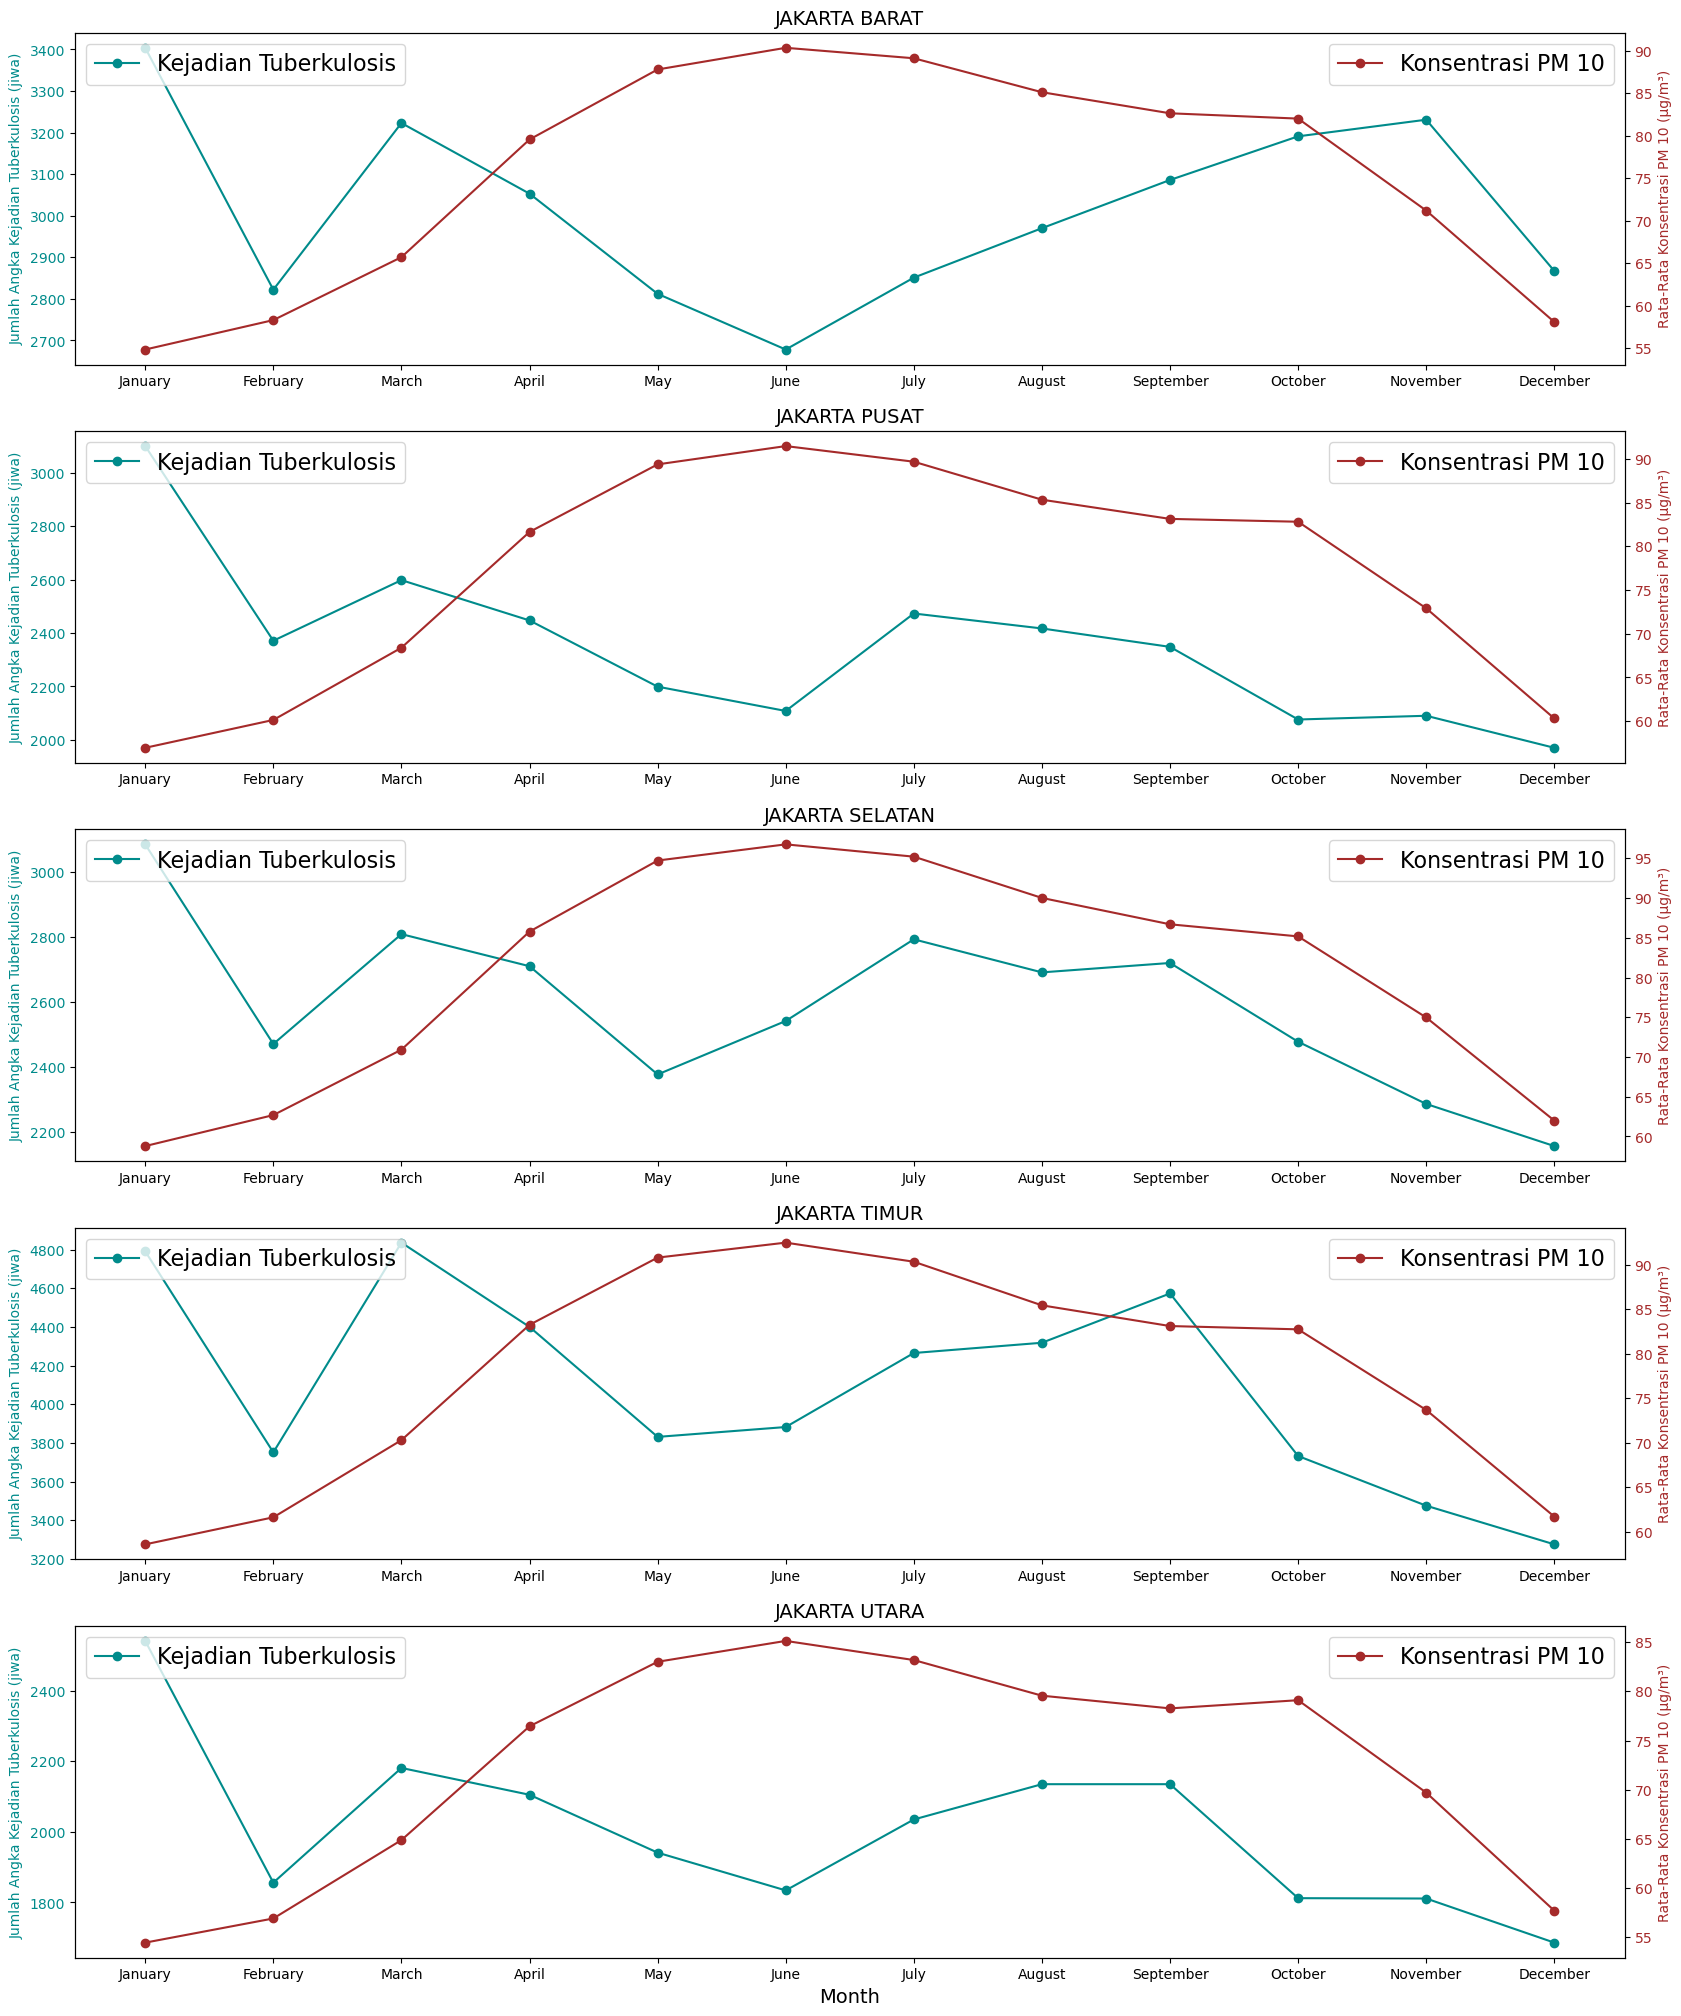

In [55]:
indicators = ['tb', 'pm10']

# Group data by KABKOT
grouped_data = df_tb_pm10.groupby('KABKOT')

# Plot time series for 'tb' and 'pm10' for each KABKOT
fig, axs = plt.subplots(len(grouped_data), 1, figsize=(20, len(grouped_data)*5), sharex=False, gridspec_kw={'hspace': 0.2})


for (name, group), ax in zip(grouped_data, axs):
    x = group['month']
    y1 = group['tb']
    y2 = group['pm10']

    ax.plot(x, y1, label='Kejadian Tuberkulosis', marker='o', color='darkcyan')
    ax.set_ylabel(f'Jumlah Angka Kejadian Tuberkulosis (jiwa)', color='darkcyan')
    ax.tick_params(axis='y', labelcolor='darkcyan')

    ax2 = ax.twinx()
    ax2.plot(x, y2, label='Konsentrasi PM 10', marker='o', color='brown')
    ax2.set_ylabel(f'Rata-Rata Konsentrasi PM 10 (µg/m³)', color='brown')
    ax2.tick_params(axis='y', labelcolor='brown')

    ax.legend(loc= 'upper left', fontsize=16)
    ax2.legend(loc= 'upper right', fontsize=16)
    
# Add common x-axis label
axs[-1].set_xlabel('Month', fontsize= 14)
axs[-1].set_title('JAKARTA UTARA', fontsize= 14)
axs[-2].set_title('JAKARTA TIMUR',fontsize= 14)
axs[-3].set_title('JAKARTA SELATAN', fontsize= 14)
axs[-4].set_title('JAKARTA PUSAT', fontsize= 14)
axs[-5].set_title('JAKARTA BARAT', fontsize= 14)

plt.show()